#Análisis libre de un dataset


##Importación de bibliotecas y conjuntos de datos a utilizar:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import seaborn as sns

En el ejercicio se propone el uso de un dataset ('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv/data.csv') pero actualmente este enlace está descontinuado, por lo que para este ejercicio vamos a utilizar la versión actualizada de los mismos datos, la cuál se puede encontrar en: ('https://opendata.ecdc.europa.eu/covid19/nationalcasedeath_eueea_daily_ei/csv/data.csv')

In [2]:
#Información descontinuada, con información correspondiente solo a 2020
#url_data = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv/data.csv'

#Información actualizada a agosto 2022
url_upToDateData = 'https://opendata.ecdc.europa.eu/covid19/nationalcasedeath_eueea_daily_ei/csv/data.csv'

#Conjunto de datos donde se establece el número de casos nuevos con información de rango de edades
url_ageSpecific = 'https://opendata.ecdc.europa.eu/covid19/agecasesnational/csv/data.csv'

#covid19In2020 = pd.read_csv(url_data)
upToDateData = pd.read_csv(url_upToDateData)
ageSpecific = pd.read_csv(url_ageSpecific)

##Verificar la estructura de los datos:

In [3]:
upToDateData.dtypes

dateRep                     object
day                          int64
month                        int64
year                         int64
cases                      float64
deaths                     float64
countriesAndTerritories     object
geoId                       object
countryterritoryCode        object
popData2020                  int64
continentExp                object
dtype: object

Información general del conjunto de datos:

In [4]:
upToDateData.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp
0,08/08/2022,8,8,2022,6114.0,9.0,Austria,AT,AUT,8901064,Europe
1,07/08/2022,7,8,2022,3914.0,6.0,Austria,AT,AUT,8901064,Europe
2,06/08/2022,6,8,2022,4799.0,3.0,Austria,AT,AUT,8901064,Europe
3,05/08/2022,5,8,2022,5800.0,6.0,Austria,AT,AUT,8901064,Europe
4,04/08/2022,4,8,2022,5996.0,11.0,Austria,AT,AUT,8901064,Europe


In [5]:
upToDateData.describe()

,day,month,year,cases,deaths,popData2020
count,26651.000000,26651.000000,26651.000000,26555.000000,26366.000000,2.665100e+04
mean,15.666579,6.231511,2020.887059,6140.654415,42.867367,1.538148e+07
std,8.821212,3.256107,0.762785,21889.756331,133.123080,2.142770e+07
min,1.000000,1.000000,2020.000000,-348846.000000,-217.000000,3.874700e+04
25%,8.000000,4.000000,2020.000000,110.000000,0.000000,2.095861e+06
50%,16.000000,6.000000,2021.000000,691.000000,6.000000,6.951482e+06
75%,23.000000,9.000000,2021.000000,3602.500000,33.000000,1.152244e+07
max,31.000000,12.000000,2022.000000,501635.000000,13743.000000,8.316671e+07


##Datos generales del conjunto de datos principal

Top 5 de países con más muertes

In [6]:
hbar = upToDateData[['countriesAndTerritories', 'deaths']].groupby(['countriesAndTerritories'], as_index=False).sum().sort_values(by='deaths', ascending=False).head(5).set_index(['countriesAndTerritories'])
hbar

,deaths
countriesAndTerritories,
Italy,173426.0
France,152822.0
Germany,145239.0
Poland,116717.0
Spain,111524.0


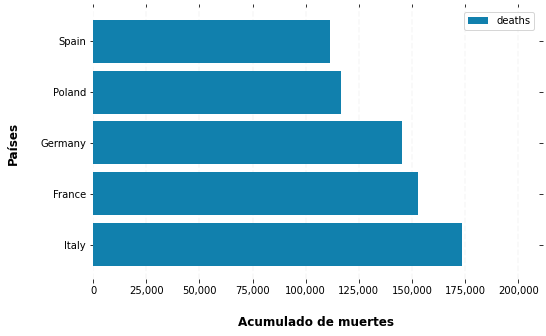

In [7]:
ax = hbar.plot(kind='barh', figsize=(8, 5), color='#1180ad', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Acumulado de muertes", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Países", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

Top 5 de mayor porcentaje de muertes por población

In [8]:
deathsbypop = upToDateData[['countriesAndTerritories', 'deaths', 'popData2020']]
deathsbypop = deathsbypop.groupby('countriesAndTerritories', as_index=False).agg(deaths=('deaths','sum'),pop=('popData2020', 'mean'))
deathsbypop['deaths_by_pop'] = deathsbypop['deaths'] / deathsbypop['pop']

dbars = deathsbypop[['countriesAndTerritories', 'deaths_by_pop']].sort_values(by='deaths_by_pop', ascending=False).head(5).set_index(['countriesAndTerritories'])
dbars

,deaths_by_pop
countriesAndTerritories,
Bulgaria,0.005388
Hungary,0.004807
Croatia,0.004053
Czechia,0.003797
Slovakia,0.003715


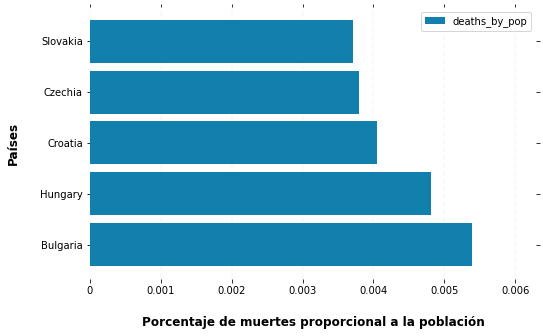

In [9]:
ax = dbars.plot(kind='barh', figsize=(8, 5), color='#1180ad', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Porcentaje de muertes proporcional a la población", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Países", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

Top de casos de covid por rango de edad

In [10]:
ageSpecific['age_group'].replace('<15yr','0-15yr', inplace=True)
agesBar = ageSpecific[['age_group', 'new_cases']].groupby('age_group', as_index = False).sum().set_index(['age_group'])

agesBar

,new_cases
age_group,
0-15yr,24085954.0
15-24yr,21625666.0
25-49yr,63829701.0
50-64yr,30241819.0
65-79yr,14505248.0
80+yr,6444378.0


Text(0, 0.5, 'Número de casos')

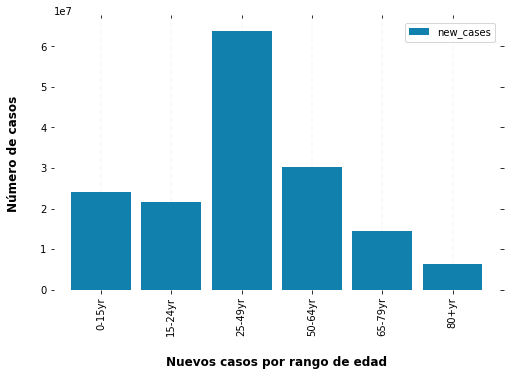

In [11]:
ax = agesBar.plot(kind='bar', figsize=(8, 5), color='#1180ad', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Nuevos casos por rango de edad", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Número de casos", labelpad=20, weight='bold', size=12)

# Format y-axis label
#ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

##Creación de un conjunto de datos con información combinada

Conversión del campo de fecha de la defición "object" a un campo de tipo fecha para poder obtener el año y el número de semana en los cuales se registran los nuevos casos. Esto es necesario para poder combinar la información donde se obtienen los rangos de edades.

In [12]:
upToDateData['dateRep'] = pd.to_datetime(upToDateData['dateRep'])
upToDateData['year_week'] = upToDateData['dateRep'].dt.strftime('%Y-%U')
upToDateData['week'] = upToDateData['dateRep'].dt.strftime('%U')
covid = upToDateData[['countriesAndTerritories', 'geoId', 'year_week', 'year', 'week', 'popData2020', 'cases', 'deaths']].loc[upToDateData['continentExp'].isin(['Europe'])]

Mostramos los datos obtenidos para el conjunto de datos de covid:

In [13]:
covid.sort_values(['countriesAndTerritories', 'year_week'], ascending = True)

,countriesAndTerritories,geoId,year_week,year,week,popData2020,cases,deaths
859,Austria,AT,2020-00,2020,00,8901064,548.0,11.0
890,Austria,AT,2020-00,2020,00,8901064,4.0,0.0
645,Austria,AT,2020-01,2020,01,8901064,4477.0,33.0
676,Austria,AT,2020-01,2020,01,8901064,790.0,8.0
706,Austria,AT,2020-01,2020,01,8901064,286.0,2.0
...,...,...,...,...,...,...,...,...
25942,Sweden,SE,2022-48,2022,48,10327589,26572.0,21.0
25761,Sweden,SE,2022-49,2022,49,10327589,976.0,7.0
25791,Sweden,SE,2022-49,2022,49,10327589,101.0,8.0
25822,Sweden,SE,2022-49,2022,49,10327589,307.0,3.0


Agrupamos los datos para obtener los valores totales por semana del año:

In [14]:
covid = covid.groupby(
    ['countriesAndTerritories', 'geoId', 'year_week', 'year', 'week'], as_index = False).agg(
        deaths=('deaths', 'sum'), 
        cases=('cases', 'sum'), 
        pop=('popData2020', 'mean')).sort_values(['countriesAndTerritories', 'geoId', 'year_week'], 
                                                  ascending = True)

Ajustamos los nombres de las columnas para concordar con el conjunto de datos por edades:

In [15]:
covid.rename(columns = {'countriesAndTerritories':'country', 'geoId': 'country_code'}, inplace = True)

Para el conjunto de datos del rango de edades, esta información no se capturaba en las primeras etapas de la pandemia, por lo que existen muchas observaciones donde no existen datos. Para prevenir errores, rellenamos con cero esas observaciones.

In [16]:
ageSpecific.fillna(0, inplace = True)

Mostramos la información relacionada a los nuevos casos por rango de edad. 

In [17]:
covidByAge = ageSpecific[['country', 'country_code', 'year_week', 'age_group', 'new_cases', 'population']].sort_values(['country', 'year_week' ])
covidByAge.head(10)

,country,country_code,year_week,age_group,new_cases,population
0,Austria,AT,2020-01,0-15yr,0.0,1285488
136,Austria,AT,2020-01,15-24yr,0.0,941982
272,Austria,AT,2020-01,25-49yr,0.0,3002329
408,Austria,AT,2020-01,50-64yr,0.0,1986578
544,Austria,AT,2020-01,65-79yr,0.0,1214182
680,Austria,AT,2020-01,80+yr,0.0,502105
1,Austria,AT,2020-02,0-15yr,0.0,1285488
137,Austria,AT,2020-02,15-24yr,0.0,941982
273,Austria,AT,2020-02,25-49yr,0.0,3002329
409,Austria,AT,2020-02,50-64yr,0.0,1986578


Transponemos la información para cambiar las diferentes categorías en campos:

In [18]:
covidAge = covidByAge.pivot(index=['country', 'country_code', 'year_week'], columns='age_group', values='new_cases').reset_index(drop = False)

Construcción de un con junto de datos que contiene la información de nuevos casos y la especificación de casos por rango de edades:

In [19]:
covidFinal = covid.merge(covidAge, left_on=['country', 'country_code', 'year_week'], right_on = ['country', 'country_code', 'year_week'], how='left')

Dado que la información corresponde solo a paises europeos, existen muchas observasiones que no contienen información, por lo que se eliminan del conjunto de datos para evitar errores.

In [20]:
covidFinal.dropna(inplace=True)

##Árboles de decisión: Regresión para predecir el número de muertes

In [21]:
dtr = covidFinal[['deaths', 'year', 'week', 'cases', 'pop', '0-15yr', '15-24yr', '25-49yr', '50-64yr', '65-79yr', '80+yr']]
dtr

,deaths,year,week,cases,pop,0-15yr,15-24yr,25-49yr,50-64yr,65-79yr,80+yr
1,52.0,2020,01,5766.0,8901064.0,0.0,0.0,0.0,0.0,0.0,0.0
2,144.0,2020,02,3937.0,8901064.0,0.0,0.0,0.0,0.0,0.0,0.0
3,32.0,2020,05,637.0,8901064.0,0.0,0.0,0.0,0.0,0.0,0.0
4,186.0,2020,06,10204.0,8901064.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,2020,08,8.0,8901064.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4303,66.0,2022,27,3582.0,10327589.0,126.0,363.0,1517.0,986.0,561.0,677.0
4304,31.0,2022,28,3480.0,10327589.0,233.0,493.0,1983.0,1211.0,696.0,820.0
4305,83.0,2022,29,5971.0,10327589.0,199.0,545.0,2033.0,1304.0,834.0,1032.0
4306,59.0,2022,30,5710.0,10327589.0,172.0,510.0,1991.0,1247.0,802.0,977.0


Comprobamos que los valores del conjunto de datos sean numéricos para poder utilizar un modelo de regresión.

In [22]:
dtr.dtypes

deaths     float64
year         int64
week        object
cases      float64
pop        float64
0-15yr     float64
15-24yr    float64
25-49yr    float64
50-64yr    float64
65-79yr    float64
80+yr      float64
dtype: object

In [23]:
dtr['week']=dtr['week'].astype(str).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Preparando los datos: La variable dependiente serán las muertes, las cuales intentamos predecir, considerando el resto de las columnas del conjunto de datos preparado.

In [24]:
X = dtr.drop('deaths',axis=1)
y = dtr['deaths']

Separamos el 70% de los datos para entrenamiento, dejando el 30% restante para prueba del modelo de regresión.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Entrenamos el modelo:

In [26]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

Predicción de muertes:

In [27]:
y_pred = regressor.predict(X_test)

Comprobamos las diferencias en el modelo:

In [28]:
df=pd.DataFrame({'Real':y_test, 'Predicted':y_pred})
df

,Real,Predicted
1383,615.0,940.0
1948,0.0,2.0
1129,12.0,2.0
263,120.0,108.0
3236,2.0,23.0
...,...,...
1087,30.0,16.0
3801,555.0,516.0
4148,366.0,354.0
1247,41.0,56.0


Evaluación del modelo:

In [29]:
print('Error Absoluto Medio:', metrics.mean_absolute_error(y_test, y_pred))
print('Error Cuadrático:', metrics.mean_squared_error(y_test, y_pred))
print('Error cuadrático medio de la raíz:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error Absoluto Medio: 163.24242424242425
Error Cuadrático: 166123.64141414143
Error cuadrático medio de la raíz: 407.5826804639047


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


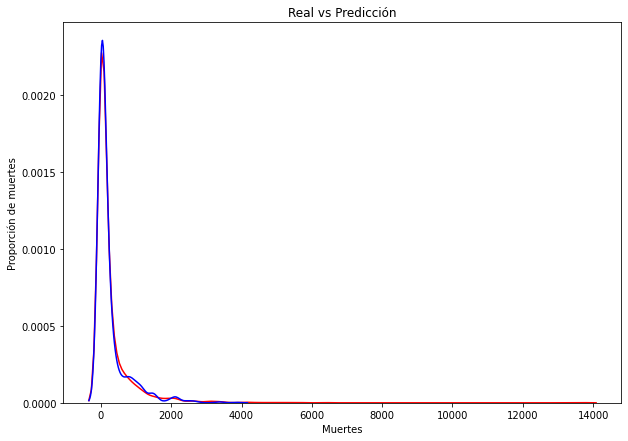

In [30]:
plt.figure(figsize=(10, 7))
ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Real vs Predicción')
plt.xlabel('Muertes')
plt.ylabel('Proporción de muertes')
plt.show()
plt.close()